<a href="https://colab.research.google.com/github/anwishn/ESAA/blob/main/project_YB4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<데이터 출처>

https://www.bigdata-environment.kr/user/data_market/detail.do?id=306627b0-2f03-11ea-bccd-b704c648ae09

<캐글 대회>

https://www.kaggle.com/competitions/coffeecsmr/data

# **1. 라이브러리 및 데이터**

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
# 기본 모듈 불러오기
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import re
import warnings
warnings.filterwarnings(action='ignore')

In [47]:
# 데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/data/coffeecsmr/train.csv')
test = pd.read_csv('/content/drive/MyDrive/data/coffeecsmr/test.csv')
y = pd.read_csv('/content/drive/MyDrive/data/coffeecsmr/y.csv')
submission = pd.read_csv('/content/drive/MyDrive/data/coffeecsmr/sample_submission.csv')

# **2. 탐색적 자료분석(EDA)**

## 1) 일부 데이터 미리보기

<데이터 구성>

* 해당 행정동에서 0시~24시까지 하루 동안 커피분야의 매장에서 소비를 일으킨 성별 연령대별 고유 인구의 수를 제공합니다.

* gov_dn_cd, bntr_nm, signgu_nm, adstrd_nm, de, sex_se, year_se, cnsmr_popltn_co 정보로 구성되어있으며, 이를 이용하여 **cnsmr_popltn_co**(커피 소비인구)를 예측 할 수 있습니다.



>* gov_dn_cd - 행정동코드
* bntr_nm - 시도명
* signgu_nm - 시군구명
* adstrd_nm - 행정동명
* de - 기준일자
* sex_se - 성별
* year_se - 연령대
* **cnsmr_popltn_co** - 소비인구(명)

<파일 구성>

train.csv : 해당 파일은 train에 사용되는 gov_dn_cd, bntr_nm, signgu_nm, adstrd_nm, de, sex_se, year_se 정보와 소비인구 정보인 cnsmr_popltn_co를 포함하고 있습니다.

test.csv : 해당 파일은 train에 사용되는 gov_dn_cd, bntr_nm, signgu_nm, adstrd_nm, de, sex_se, year_se 정보를 포함하고 있습니다.

sample_submission.csv : 첫번째 컬럼의 id에 해당하는 값에 상응하는 커피 소비인구 값을 입력해주시고 제출해주시면 됩니다.

In [48]:
train.head()

,gov_dn_cd,bntr_nm,signgu_nm,adstrd_nm,de,sex_se,year_se
0,4146352000,경기도,용인시 기흥구,구갈동,20201025,F,35
1,1156065000,서울특별시,영등포구,신길3동,20201015,F,20
2,4139064000,경기도,시흥시,능곡동,20200812,M,50
3,1114058000,서울특별시,중구,장충동,20200923,F,30
4,4121056000,경기도,광명시,광명5동,20200923,F,30


In [49]:
test.head()

,gov_dn_cd,bntr_nm,signgu_nm,adstrd_nm,de,sex_se,year_se
0,3017066000,대전광역시,서구,둔산3동,20200817,M,45
1,1168065000,서울특별시,강남구,역삼2동,20200904,F,30
2,4113565000,경기도,성남시 분당구,판교동,20201010,F,55
3,4146555000,경기도,용인시 수지구,죽전2동,20201003,M,40
4,4825059000,경상남도,김해시,삼안동,20200930,F,20


In [50]:
y.head()

,cnsmr_popltn_co
0,187.3
1,22.5
2,37.5
3,37.5
4,22.5


## 2) 데이터 요약

In [51]:
print(train.shape)
print(test.shape)
print(y.shape)
print(submission.shape)

(576141, 7)
(283771, 7)
(576141, 1)
(283771, 2)


In [52]:
train.info()   # 피처의 타입과 Null 값 알아보기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576141 entries, 0 to 576140
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   gov_dn_cd  576141 non-null  int64 
 1   bntr_nm    576141 non-null  object
 2   signgu_nm  576141 non-null  object
 3   adstrd_nm  576141 non-null  object
 4   de         576141 non-null  int64 
 5   sex_se     576141 non-null  object
 6   year_se    576141 non-null  object
dtypes: int64(2), object(5)
memory usage: 30.8+ MB


In [53]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283771 entries, 0 to 283770
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   gov_dn_cd  283771 non-null  int64 
 1   bntr_nm    283771 non-null  object
 2   signgu_nm  283771 non-null  object
 3   adstrd_nm  283771 non-null  object
 4   de         283771 non-null  int64 
 5   sex_se     283771 non-null  object
 6   year_se    283771 non-null  object
dtypes: int64(2), object(5)
memory usage: 15.2+ MB


## 3) 데이터의 요약통계량 확인

In [54]:
pd.options.display.float_format = '{:.1f}'.format

In [55]:
train.describe()   # 숫자형 column들의 기술 통게량

,gov_dn_cd,de
count,576141.0,576141.0
mean,3148638673.8,20200916.1
std,1344880591.0,83.4
min,1111051500.0,20200801.0
25%,1174068500.0,20200823.0
50%,3114057000.0,20200916.0
75%,4183034000.0,20201009.0
max,5013062000.0,20201031.0


In [56]:
test.describe()

,gov_dn_cd,de
count,283771.0,283771.0
mean,3147289914.1,20200916.0
std,1344718998.1,83.4
min,1111051500.0,20200801.0
25%,1174066000.0,20200823.0
50%,3114056000.0,20200916.0
75%,4183025000.0,20201009.0
max,5013062000.0,20201031.0


## 4) 결측치 확인 및 데이터 전처리

-결측치 확인

In [57]:
train.isna().sum()     # NaN 값 있는지 확인

gov_dn_cd    0
bntr_nm      0
signgu_nm    0
adstrd_nm    0
de           0
sex_se       0
year_se      0
dtype: int64

In [58]:
test.isna().sum()

gov_dn_cd    0
bntr_nm      0
signgu_nm    0
adstrd_nm    0
de           0
sex_se       0
year_se      0
dtype: int64

-데이터 전처리

* 시도명 **bntr_nm** 중 부산광역시 데이터만 추출

In [59]:
train.bntr_nm.value_counts()

서울특별시      144790
경기도        138259
부산광역시       44732
인천광역시       34298
경상남도        28566
대구광역시       27395
경상북도        22706
강원도         18994
광주광역시       17831
전라북도        17710
충청남도        17479
대전광역시       16029
전라남도        14632
충청북도        14115
울산광역시        9500
제주특별자치도      9105
Name: bntr_nm, dtype: int64

In [60]:
test.bntr_nm.value_counts()

서울특별시      71372
경기도        68248
부산광역시      22004
인천광역시      17119
경상남도       13951
대구광역시      13370
경상북도       11277
강원도         9253
광주광역시       8881
충청남도        8569
전라북도        8551
대전광역시       7838
충청북도        7104
전라남도        7028
울산광역시       4644
제주특별자치도     4562
Name: bntr_nm, dtype: int64

In [61]:
train[train.bntr_nm=='부산광역시'].index

Int64Index([    10,     15,     38,     47,     57,     63,     70,     80,
                81,     90,
            ...
            576003, 576018, 576023, 576064, 576071, 576082, 576101, 576102,
            576116, 576130],
           dtype='int64', length=44732)

In [62]:
train = train[train.bntr_nm=='부산광역시']
test = test[test.bntr_nm=='부산광역시']
y = y.iloc[train[train.bntr_nm=='부산광역시'].index]
submission = submission.iloc[test[test.bntr_nm=='부산광역시'].index]

* 행정동코드 **gov_dn_cd**는 불필요해 제거

In [63]:
train = train.drop(['gov_dn_cd'],axis = 1)
test = test.drop(['gov_dn_cd'],axis = 1)

* 시군구명 **signgu_nm**으로 분류

In [64]:
train.signgu_nm.value_counts()

부산진구    5138
해운대구    5112
사하구     3975
동래구     3423
금정구     3229
수영구     3069
남구      2668
연제구     2654
북구      2528
사상구     2473
강서구     1972
중구      1846
서구      1748
동구      1710
기장군     1618
영도구     1569
Name: signgu_nm, dtype: int64

* 행정동명 **adstrd_nm**는 불필요해 제거

In [65]:
train[train.signgu_nm=='부산진구'].adstrd_nm.value_counts()

부전2동    442
부전1동    420
전포1동    392
전포2동    386
양정1동    376
개금1동    325
가야1동    320
범천1동    297
양정2동    277
부암1동    270
초읍동     263
당감1동    256
개금2동    251
부암3동    218
연지동     211
가야2동    173
당감4동    113
당감2동    102
개금3동     46
Name: adstrd_nm, dtype: int64

In [66]:
train = train.drop(['adstrd_nm'],axis = 1)
test = test.drop(['adstrd_nm'],axis = 1)

* 성별 **sex_se** 기준으로 분류

In [67]:
train.sex_se.value_counts()

M    21605
F    20896
X     2231
Name: sex_se, dtype: int64

* 연령대 **year_se** 기준으로 분류

In [68]:
train.year_se.value_counts()

25    5908
30    5571
20    5545
35    5016
40    4666
45    4531
50    4029
55    2771
15    2392
xx    2231
60    1471
65     392
70     178
00      31
Name: year_se, dtype: int64

In [69]:
columns = train.columns.values
columns1 = test.columns.values

train = pd.concat([train, 
                     pd.get_dummies(train.bntr_nm), 
                     pd.get_dummies(train.signgu_nm),
                     pd.get_dummies(train.de),
                     pd.get_dummies(train.sex_se),
                     pd.get_dummies(train.year_se)],axis=1).drop(columns, axis=1)

test = pd.concat([test,
                     pd.get_dummies(test.bntr_nm), 
                     pd.get_dummies(test.signgu_nm),
                     pd.get_dummies(test.de),
                     pd.get_dummies(test.sex_se),
                     pd.get_dummies(test.year_se)],axis=1).drop(columns1, axis=1)


train.head()

,부산광역시,강서구,금정구,기장군,남구,동구,동래구,부산진구,북구,사상구,...,30,35,40,45,50,55,60,65,70,xx
10,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
15,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
38,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
57,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

train.iloc[:,:1] = sc.fit_transform(train.iloc[:,:1])
test.iloc[:,:1] = sc.transform(test.iloc[:,:1])

train.head()

,부산광역시,강서구,금정구,기장군,남구,동구,동래구,부산진구,북구,사상구,...,30,35,40,45,50,55,60,65,70,xx
10,0.0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
15,0.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
38,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,0.0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
57,0.0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


* y값 분포 확인

In [71]:
y.describe()

,cnsmr_popltn_co
count,44732.0
mean,81.2
std,110.1
min,22.5
25%,30.0
50%,52.5
75%,89.9
max,2779.9


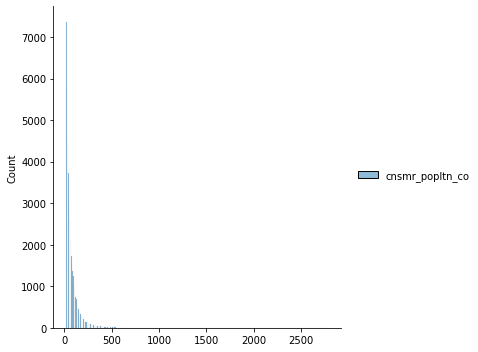

In [72]:
sns.displot(y)

In [73]:
print(len(np.where(y > 100)[0]))
print(len(np.where(y > 300)[0]))
print(len(np.where(y > 500)[0]))
print(len(np.where(y > 1000)[0]))

9753
1208
338
107


=> y 분포도가 불균형해 로그변환 필요

## 5) 모델링 데이터 구성

In [74]:
X = train
y = np.log1p(y['cnsmr_popltn_co'])
target = test

# **3. 회귀 모델 적용**

In [75]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [76]:
kf = KFold(n_splits =  10, shuffle = True, random_state = 42)

In [77]:
gbm = GradientBoostingRegressor(random_state = 42)

rmse_list = []
gb_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    gbm.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in gbm.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in gbm.predict(target)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    gb_pred += (sub_pred / 10)

np.mean(rmse_list)

59.48057234044079

In [78]:
lgbm = LGBMRegressor(random_state = 518)

rmse_list = []
lgb_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    lgbm.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in lgbm.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in lgbm.predict(target)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    lgb_pred += (sub_pred / 10)

np.mean(rmse_list)

61.89048170283333

In [79]:
xgb = XGBRegressor(random_state = 518)

rmse_list = []
xgb_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    xgb.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in xgb.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in xgb.predict(target)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    xgb_pred += (sub_pred / 10)

np.mean(rmse_list)

[13:48:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:48:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:49:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:49:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:49:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:49:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:49:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:49:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

59.4232200059793

In [80]:
rf = RandomForestRegressor(random_state = 518)

rmse_list = []
rf_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    rf.fit(tr_x, tr_y)
    
    pred = np.expm1([0 if x < 0 else x for x in rf.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in rf.predict(target)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    rf_pred += (sub_pred / 10)

np.mean(rmse_list)

75.30469930681951

In [81]:
pred = (xgb_pred + lgb_pred + rf_pred + gb_pred) / 4